# Import Packages 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix

# Load Data

In [2]:
data=pd.read_json('train.json')  ### Load data into a pandas dataframe

In [3]:
unique_ingredients=[] ### Initialize the list for all ingredients 
for i in range(len(data.id)):
    for k in data.ingredients[i]:
        if k not in unique_ingredients:
            unique_ingredients.append(k) ## Append the ingredient if it is not in the unique_ingredients

In [4]:
N = len(unique_ingredients)
M = len(data.id)
binary_assignment=[] ## Initialize the binary_assignment as a list
for i in range(M):
    assigment=np.zeros(N) ### initialze the ingredients as all 0
    for j in data.ingredients[i]:
        assigment[unique_ingredients.index(j)]=1 ### Assigne 1 if the ingreident is in the dish
    binary_assignment.append(assigment)

In [5]:
binary_assignment=np.reshape(binary_assignment,(M,N)) ## Reshape the assignemt into M by N matrix 

In [6]:
from sklearn import preprocessing
unique_labels=np.unique(data.cuisine)
le = preprocessing.LabelEncoder()
le.fit(data.cuisine)
labels=le.transform(data.cuisine)
label=np.array(labels)

In [228]:
print(len(America_ind))
print(len(Asia_ind))
print(len(EU_ind))
print(len(Africa_ind))
print(unique_labels)
print(len(labels))
print(len(unique_ingredients))

13297
11048
14608
821
['brazilian' 'british' 'cajun_creole' 'chinese' 'filipino' 'french'
 'greek' 'indian' 'irish' 'italian' 'jamaican' 'japanese' 'korean'
 'mexican' 'moroccan' 'russian' 'southern_us' 'spanish' 'thai'
 'vietnamese']
39774
6714


## Create second label for each continents

In [7]:
America=['cajun_creole','southern_us','jamaican','mexican','brazilian']
Asia=['chinese','filipino','thai','vietnamese','japanese','korean','indian']
EU=['french','greek','italian','russian','spanish','irish','british']
Africa=['moroccan']

In [8]:
labels2=[]
for i in data.cuisine:
    if i in America:
        labels2.append(0)
    elif i in Asia:
        labels2.append(1)
    elif i in EU:
        labels2.append(2)
    else:
        labels2.append(3)


In [9]:
label2=np.array(labels2)
America_ind=np.where(label2==0)[0]
Asia_ind=np.where(label2==1)[0]
EU_ind=np.where(label2==2)[0]
Africa_ind=np.where(label2==3)[0]

In [157]:
America_X=binary_assignment[America_ind,:]
America_y=label[America_ind]-min(label[America_ind])
Asia_X=binary_assignment[Asia_ind,:]
Asia_y=label[Asia_ind]-min(label[Asia_ind])
EU_X=binary_assignment[EU_ind,:]
EU_y=label[EU_ind]-min(label[EU_ind])
Africa_X=binary_assignment[Africa_ind,:]
Africa_y=label[Asia_ind]-min(label[Africa_ind])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(binary_assignment, labels2, test_size=0.2, random_state=0)

In [132]:
Ac_am_train=[]
Ac_am_test=[]
Ac_as_train=[]
Ac_as_test=[]
Ac_eu_train=[]
Ac_eu_test=[]

## Perceptron

In [37]:
clf_perceptron = Perceptron(tol=0.00001,random_state=0)
label3=np.ones(len(labels))
label3[America_ind]=-1

In [38]:
X_train, X_test, y_train, y_test = train_test_split(binary_assignment, label2, test_size=0.2, random_state=0)
clf_perceptron.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=1e-05, verbose=0, warm_start=False)

In [175]:
y_pcp_test_pred=clf_perceptron.predict(X_test)
y_pcp_train_pred=clf_perceptron.predict(X_train)
accuracy_pcp_test = np.sum(y_test_pred == y_test) / len(y_test)
accuracy_pcp_train = np.sum(y_train_pred == y_train) / len(y_train)
print('\tAccuracy of test', accuracy_pcp_test)
print('\tAccuracy of training',accuracy_pcp_train)

	Accuracy of test 0.9054682589566311
	Accuracy of training 0.9465413746503661


In [184]:
cm_all_pcp = confusion_matrix(y_test, y_pcp_test_pred)
print(cm_all_pcp/cm_all_pcp.sum(axis=0))

[[0.86613021 0.04236922 0.07140268 0.03355705]
 [0.02523775 0.90185906 0.02283436 0.06711409]
 [0.10424287 0.04798962 0.89923885 0.1409396 ]
 [0.00438917 0.0077821  0.0065241  0.75838926]]


In [52]:
X_train_am, X_test_am, y_train_am, y_test_am = train_test_split(America_X, America_y, test_size=0.2, random_state=0)
clf_pcp_Am=Perceptron(tol=0.00001,random_state=0)
%time clf_pcp_Am.fit(X_train_am,y_train_am)

CPU times: user 5.01 s, sys: 323 ms, total: 5.33 s
Wall time: 5.41 s


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=1e-05, verbose=0, warm_start=False)

In [135]:
y_test_pred_am=clf_pcp_Am.predict(X_test_am)
y_train_pred_am=clf_pcp_Am.predict(X_train_am)
accuracy_test_am = np.sum(y_test_pred_am == y_test_am) / len(y_test_am)
accuracy_train_am = np.sum(y_train_pred_am == y_train_am) / len(y_train_am)
print('\tAccuracy of test', accuracy_test_am)
print('\tAccuracy of training',accuracy_train_am)

	Accuracy of test 0.8635338345864662
	Accuracy of training 0.9563786781987402


In [183]:
cm_am = confusion_matrix(y_test_am, y_test_pred_am)
print((cm_am/cm_am.sum(axis=0)))
print(America)

[[0.56198347 0.         0.03658537 0.01388889 0.00797267]
 [0.04958678 0.75971731 0.         0.01466049 0.06833713]
 [0.04958678 0.01413428 0.84146341 0.00694444 0.01138952]
 [0.15702479 0.04240283 0.02439024 0.92515432 0.06264237]
 [0.18181818 0.18374558 0.09756098 0.03935185 0.84965831]]
['cajun_creole', 'southern_us', 'jamaican', 'mexican', 'brazilian']


In [69]:
X_train_as, X_test_as, y_train_as, y_test_as= train_test_split(Asia_X, Asia_y, test_size=0.2, random_state=0,shuffle=True)
clf_pcp_as=Perceptron(tol=0.00001,random_state=0)
%time clf_pcp_as.fit(X_train_as,y_train_as)

CPU times: user 4.5 s, sys: 6.05 ms, total: 4.51 s
Wall time: 4.52 s


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=1e-05, verbose=0, warm_start=False)

In [187]:
y_test_pred_as=clf_pcp_as.predict(X_test_as)
y_train_pred_as=clf_pcp_as.predict(X_train_as)
accuracy_test_as = np.sum(y_test_pred_as == y_test_as) / len(y_test_as)
accuracy_train_as = np.sum(y_train_pred_as == y_train_as) / len(y_train_as)
print('\tAccuracy of test', accuracy_test_as)
print('\tAccuracy of training',accuracy_train_as)
cm_pcp_as = confusion_matrix(y_test_as, y_test_pred_as)

	Accuracy of test 0.7923076923076923
	Accuracy of training 0.9179678660330391
[[0.86725664 0.11864407 0.01172529 0.08955224 0.15686275 0.07443366
  0.12315271]
 [0.02212389 0.6440678  0.00502513 0.01492537 0.01960784 0.01618123
  0.02463054]
 [0.00442478 0.06214689 0.90954774 0.03731343 0.01470588 0.03883495
  0.03448276]
 [0.05973451 0.06214689 0.0519263  0.82462687 0.06372549 0.01294498
  0.08374384]
 [0.01106195 0.01129944 0.00335008 0.02238806 0.67156863 0.00323625
  0.02955665]
 [0.0199115  0.03389831 0.01507538 0.00746269 0.04411765 0.77346278
  0.18719212]
 [0.01548673 0.06779661 0.00335008 0.00373134 0.02941176 0.08090615
  0.51724138]]


In [74]:
X_train_eu, X_test_eu, y_train_eu, y_test_eu= train_test_split(EU_X, EU_y, test_size=0.2, random_state=0,shuffle=True)
clf_pcp_eu=Perceptron(tol=0.00001,random_state=0)
%time clf_pcp_eu.fit(X_train_eu,y_train_eu)

CPU times: user 1.55 s, sys: 216 ms, total: 1.76 s
Wall time: 1.79 s


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=1e-05, verbose=0, warm_start=False)

In [77]:
y_test_pred_eu=clf_pcp_eu.predict(X_test_eu)
y_train_pred_eu=clf_pcp_eu.predict(X_train_eu)
accuracy_test_eu = np.sum(y_test_pred_eu == y_test_eu) / len(y_test_eu)
accuracy_train_eu = np.sum(y_train_pred_eu == y_train_eu) / len(y_train_eu)
print('\tAccuracy of test', accuracy_test_eu)
print('\tAccuracy of training',accuracy_train_eu)
cm_eu = confusion_matrix(y_test_eu, y_test_pred_eu)
print(cm_eu)

	Accuracy of test 1.0
	Accuracy of training 1.0
[[1750    0    0    0    0]
 [   0   97    0    0    0]
 [   0    0  538    0    0]
 [   0    0    0  413    0]
 [   0    0    0    0  124]]


In [142]:
accuracy_cont_train=[accuracy_pcp_train]
accuracy_cont_test=[accuracy_pcp_test]

In [136]:
Ac_am_train.append(accuracy_train_am)
Ac_am_test.append(accuracy_test_am)
Ac_as_train.append(accuracy_train_as)
Ac_as_test.append(accuracy_test_as)
Ac_eu_train.append(accuracy_train_eu)
Ac_eu_test.append(accuracy_test_eu)

In [226]:
pickle.dump(clf_perceptron, open('pcp_cont', 'wb'))
pickle.dump(clf_pcp_Am, open('pcp_am', 'wb'))
pickle.dump(clf_pcp_as, open('pcp_as', 'wb'))
pickle.dump(clf_pcp_eu, open('pcp_eu', 'wb'))

## Logistic Regression

In [208]:
Cs = [1,2,3,5]
clf = LogisticRegressionCV(Cs,cv=5, random_state=0,multi_class='ovr')
%time clf.fit(X_train, y_train)

CPU times: user 1h 27min 31s, sys: 1min 7s, total: 1h 28min 39s
Wall time: 22min 40s


LogisticRegressionCV(Cs=[1, 2, 3, 5], class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [213]:
Cs = [1,2,3,5]
clf_cw = LogisticRegressionCV(Cs,cv=5, random_state=0,multi_class='ovr',class_weight='balanced')
%time clf_cw.fit(X_train, y_train)

CPU times: user 1h 29min 3s, sys: 56.6 s, total: 1h 29min 59s
Wall time: 22min 54s


LogisticRegressionCV(Cs=[1, 2, 3, 5], class_weight='balanced', cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=0, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [209]:
y_test_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)
accuracy_lr_test = np.sum(y_test_pred == y_test) / len(y_test)
accuracy_lr_train = np.sum(y_train_pred == y_train) / len(y_train)

In [214]:
y_test_pred_wb=clf_cw.predict(X_test)
y_train_pred_wb=clf_cw.predict(X_train)
accuracy_lr_test_wb = np.sum(y_test_pred_wb == y_test) / len(y_test)
accuracy_lr_train_wb = np.sum(y_train_pred_wb == y_train) / len(y_train)

In [210]:
accuracy_cont_train.append(accuracy_lr_train)
accuracy_cont_test.append(accuracy_lr_test)

In [215]:
print('\tAccuracy of test', accuracy_lr_test)
print('\tAccuracy of training',accuracy_lr_train)
print('\tAccuracy of test', accuracy_lr_test_wb)
print('\tAccuracy of training',accuracy_lr_train_wb)

	Accuracy of test 0.9054682589566311
	Accuracy of training 0.9465413746503661
	Accuracy of test 0.8986800754242614
	Accuracy of training 0.9474527797856627


In [217]:
cm = confusion_matrix(y_test, y_test_pred)
cm_wb=confusion_matrix(y_test, y_test_pred_wb)

In [93]:
clf_lr_am = LogisticRegressionCV(Cs,cv=5, random_state=0,multi_class='ovr')
%time clf_lr_am.fit(X_train_am, y_train_am)

CPU times: user 24min, sys: 22.2 s, total: 24min 22s
Wall time: 6min 11s


LogisticRegressionCV(Cs=[1, 2, 3, 5], class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [94]:
y_test_predlr_am=clf_lr_am.predict(X_test_am)
y_train_predlr_am=clf_lr_am.predict(X_train_am)
accuracy_test_lr_am = np.sum(y_test_predlr_am == y_test_am) / len(y_test_am)
accuracy_train_lr_am = np.sum(y_train_predlr_am == y_train_am) / len(y_train_am)

In [97]:
print('\tAccuracy of test', accuracy_test_lr_am)
print('\tAccuracy of training',accuracy_train_lr_am)

	Accuracy of test 0.8823308270676692
	Accuracy of training 0.9569427470151358


In [98]:
clf_lr_as = LogisticRegressionCV(Cs,cv=5, random_state=0,multi_class='ovr')
%time clf_lr_as.fit(X_train_as, y_train_as)
y_test_predlr_as=clf_lr_as.predict(X_test_as)
y_train_predlr_as=clf_lr_as.predict(X_train_as)
accuracy_test_lr_as = np.sum(y_test_predlr_as == y_test_as) / len(y_test_as)
accuracy_train_lr_as = np.sum(y_train_predlr_as == y_train_as) / len(y_train_as)

CPU times: user 28min 39s, sys: 31.3 s, total: 29min 10s
Wall time: 7min 25s


In [99]:
print('\tAccuracy of test', accuracy_test_lr_as)
print('\tAccuracy of training',accuracy_train_lr_as)

	Accuracy of test 0.820814479638009
	Accuracy of training 0.9314324507807196


In [100]:
clf_lr_eu = LogisticRegressionCV(Cs,cv=5, random_state=0,multi_class='ovr')
%time clf_lr_eu.fit(X_train_eu, y_train_eu)
y_test_predlr_eu=clf_lr_eu.predict(X_test_eu)
y_train_predlr_eu=clf_lr_eu.predict(X_train_eu)
accuracy_test_lr_eu = np.sum(y_test_predlr_eu == y_test_eu) / len(y_test_eu)
accuracy_train_lr_eu = np.sum(y_train_predlr_eu == y_train_eu) / len(y_train_eu)

CPU times: user 6min 27s, sys: 12 s, total: 6min 39s
Wall time: 1min 46s


In [101]:
print('\tAccuracy of test', accuracy_test_lr_eu)
print('\tAccuracy of training',accuracy_train_lr_eu)

	Accuracy of test 1.0
	Accuracy of training 1.0


In [137]:
Ac_am_train.append(accuracy_train_lr_am)
Ac_am_test.append(accuracy_test_lr_am)
Ac_as_train.append(accuracy_train_lr_as)
Ac_as_test.append(accuracy_test_lr_as)
Ac_eu_train.append(accuracy_train_lr_eu)
Ac_eu_test.append(accuracy_test_lr_eu)

In [225]:
pickle.dump(clf, open('log_cont', 'wb'))
pickle.dump(clf_lr_am, open('log_am', 'wb'))
pickle.dump(clf_lr_as, open('log_as', 'wb'))
pickle.dump(clf_lr_eu, open('log_eu', 'wb'))

## Soft Linear SVM Classifier

In [102]:
parameters = { 'C' :np.linspace(0.01,1,10)}
ss = ShuffleSplit(n_splits=5, test_size=0.1,train_size=0.9)
svm_classif = GridSearchCV(LinearSVC(random_state=0, tol=1e-5,multi_class='ovr',penalty='l2'),param_grid=parameters,cv=ss)
%time svm_classif.fit(X_train, y_train)

CPU times: user 2min 9s, sys: 47 s, total: 2min 56s
Wall time: 3min 3s


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.1, train_size=0.9),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [222]:
import pickle

In [223]:
pickle.dump(svm_classif, open('SVM_cont', 'wb'))

In [106]:
y_test_pred2=svm_classif.best_estimator_.predict(X_test)
y_train_pred2=svm_classif.best_estimator_.predict(X_train)
accuracy_test2 = np.sum(y_test_pred2 == y_test) / len(y_test)
accuracy_train2 = np.sum(y_train_pred2 == y_train) / len(y_train)

In [144]:
accuracy_cont_train.append(accuracy_train2)
accuracy_cont_test.append(accuracy_test2)
print('\tAccuracy of test', accuracy_test2)
print('\tAccuracy of training',accuracy_train2)

	Accuracy of test 0.9077309868007543
	Accuracy of training 0.9531097771771583


In [122]:
import matplotlib.pyplot as plt

In [185]:
cm = confusion_matrix(y_test, y_test_pred2)
print(cm/cm.sum(axis=0))

[[0.90467075 0.02809243 0.08002668 0.02189781]
 [0.02220521 0.94608065 0.02500834 0.05109489]
 [0.0704441  0.02038967 0.88562854 0.09489051]
 [0.00267994 0.00543725 0.00933645 0.83211679]]


In [108]:
svm_classif_am = GridSearchCV(LinearSVC(random_state=0, tol=1e-5,multi_class='ovr',penalty='l2'),param_grid=parameters,cv=ss)
%time svm_classif_am.fit(X_train_am, y_train_am)
y_test_pred_svm_am=svm_classif_am.best_estimator_.predict(X_test_am)
y_train_pred_svm_am=svm_classif_am.best_estimator_.predict(X_train_am)
accuracy_test_svm_am = np.sum(y_test_pred_svm_am == y_test_am) / len(y_test_am)
accuracy_train2_svm_am = np.sum(y_train_pred_svm_am == y_train_am) / len(y_train_am)

CPU times: user 34.5 s, sys: 11.1 s, total: 45.6 s
Wall time: 45.9 s


In [109]:
print('\tAccuracy of test', accuracy_test_svm_am)
print('\tAccuracy of training',accuracy_train2_svm_am)

	Accuracy of test 0.8823308270676692
	Accuracy of training 0.9512080473817806


In [110]:
svm_classif_as = GridSearchCV(LinearSVC(random_state=0, tol=1e-5,multi_class='ovr',penalty='l2'),param_grid=parameters,cv=ss)
%time svm_classif_as.fit(X_train_as, y_train_as)
y_test_pred_svm_as=svm_classif_as.best_estimator_.predict(X_test_as)
y_train_pred_svm_as=svm_classif_as.best_estimator_.predict(X_train_as)
accuracy_test_svm_as = np.sum(y_test_pred_svm_as == y_test_as) / len(y_test_as)
accuracy_train2_svm_as = np.sum(y_train_pred_svm_as == y_train_as) / len(y_train_as)

CPU times: user 32.9 s, sys: 9.31 s, total: 42.2 s
Wall time: 42.4 s


In [111]:
print('\tAccuracy of test', accuracy_test_svm_as)
print('\tAccuracy of training',accuracy_train2_svm_as)

	Accuracy of test 0.8253393665158371
	Accuracy of training 0.9288300520479746


In [112]:
svm_classif_eu = GridSearchCV(LinearSVC(random_state=0, tol=1e-5,multi_class='ovr',penalty='l2'),param_grid=parameters,cv=ss)
%time svm_classif_eu.fit(X_train_eu, y_train_eu)
y_test_pred_svm_eu=svm_classif_eu.best_estimator_.predict(X_test_eu)
y_train_pred_svm_eu=svm_classif_eu.best_estimator_.predict(X_train_eu)
accuracy_test_svm_eu = np.sum(y_test_pred_svm_eu == y_test_eu) / len(y_test_eu)
accuracy_train2_svm_eu = np.sum(y_train_pred_svm_eu == y_train_eu) / len(y_train_eu)

CPU times: user 54.6 s, sys: 12.9 s, total: 1min 7s
Wall time: 1min 8s


In [113]:
print('\tAccuracy of test', accuracy_test_svm_eu)
print('\tAccuracy of training',accuracy_train2_svm_eu)

	Accuracy of test 1.0
	Accuracy of training 1.0


In [224]:
pickle.dump(svm_classif_am, open('SVM_am', 'wb'))
pickle.dump(svm_classif_as, open('SVM_as', 'wb'))
pickle.dump(svm_classif_eu, open('SVM_eu', 'wb'))

In [138]:
Ac_am_train.append(accuracy_train2_svm_am)
Ac_am_test.append(accuracy_test_svm_am)
Ac_as_train.append(accuracy_train2_svm_as)
Ac_as_test.append(accuracy_test_svm_as)
Ac_eu_train.append(accuracy_train2_svm_eu)
Ac_eu_test.append(accuracy_test_svm_eu)

## Evaluate model accuracy

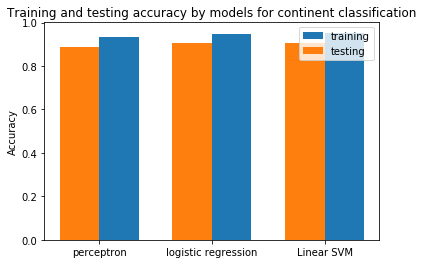

In [145]:
models=['perceptron','logistic regression','Linear SVM']
m = np.arange(len(models)) 
width = 0.35 
fig, ax = plt.subplots()
ax.bar(m+width/2,accuracy_cont_train,width,label='training')
ax.bar(m-width/2,accuracy_cont_test,width,label='testing')
ax.set_ylabel('Accuracy')
ax.set_title('Training and testing accuracy by models for continent classification')
ax.set_xticks(m)
ax.set_xticklabels(models)
ax.legend()

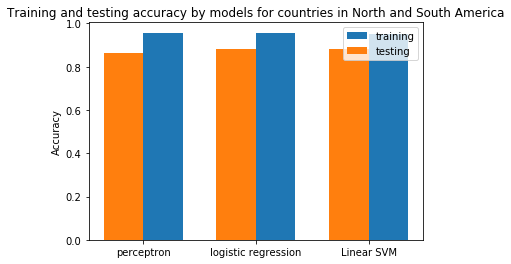

In [139]:
width = 0.35 
fig, ax = plt.subplots()
ax.bar(m+width/2,Ac_am_train,width,label='training')
ax.bar(m-width/2,Ac_am_test,width,label='testing')
ax.set_ylabel('Accuracy')
ax.set_title('Training and testing accuracy by models for countries in North and South America')
ax.set_xticks(m)
ax.set_xticklabels(models)
ax.legend()

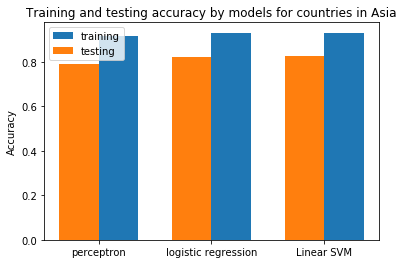

In [140]:
width = 0.35 
fig, ax = plt.subplots()
ax.bar(m+width/2,Ac_as_train,width,label='training')
ax.bar(m-width/2,Ac_as_test,width,label='testing')
ax.set_ylabel('Accuracy')
ax.set_title('Training and testing accuracy by models for countries in Asia')
ax.set_xticks(m)
ax.set_xticklabels(models)
ax.legend()

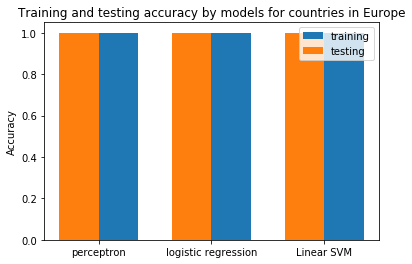

In [141]:
width = 0.35 
fig, ax = plt.subplots()
ax.bar(m+width/2,Ac_eu_train,width,label='training')
ax.bar(m-width/2,Ac_eu_test,width,label='testing')
ax.set_ylabel('Accuracy')
ax.set_title('Training and testing accuracy by models for countries in Europe')
ax.set_xticks(m)
ax.set_xticklabels(models)
ax.legend()

In [150]:
len(EU_X.sum(axis=0))

6714

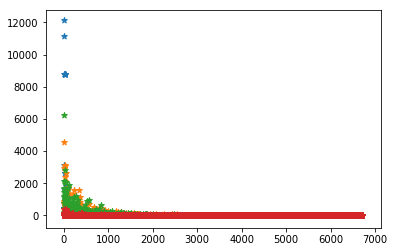

In [164]:
x_l=np.arange(6714)
plt.scatter(x_l,EU_X.sum(axis=0),marker='*')
plt.scatter(x_l,Asia_X.sum(axis=0),marker='*')
plt.scatter(x_l,America_X.sum(axis=0),marker='*')
plt.scatter(x_l,Africa_X.sum(axis=0),marker='*')